In [1]:
import efel

import pickle
import make_allen_tests_from_id# import *

from make_allen_tests_from_id import *
from neuronunit.optimisation.optimization_management import dtc_to_rheo, inject_and_plot_model30,check_bin_vm30,check_bin_vm15


import efel
import pandas as pd
import seaborn as sns

from utils import dask_map_function

import bluepyopt as bpop
import bluepyopt.ephys as ephys
import pickle
from sciunit import TestSuite
from sciunit.scores.collections import ScoreArray
import sciunit
import numpy as np
from neuronunit.optimisation.optimization_management import dtc_to_rheo, switch_logic,active_values
from neuronunit.tests.base import AMPL, DELAY, DURATION

import quantities as pq
PASSIVE_DURATION = 500.0*pq.ms
PASSIVE_DELAY = 200.0*pq.ms
import matplotlib.pyplot as plt
from bluepyopt.ephys.models import ReducedCellModel
import numpy
from neuronunit.optimisation.optimization_management import test_all_objective_test
from neuronunit.optimisation.optimization_management import check_binary_match, three_step_protocol,inject_and_plot_passive_model
from neuronunit.optimisation.model_parameters import MODEL_PARAMS
import copy

import numpy as np
from make_allen_tests import AllenTest

from bluepyopt.parameters import Parameter
from utils import dask_map_function
from make_allen_tests_from_id import get_model_parts_sweep_from_number,make_suite_known_sweep_from_static_models


In [2]:


surrogate_tests_with_cell_name_lookup = pickle.load(open('allen_NU_tests.p','rb'))
specimen_id = surrogate_tests_with_cell_name_lookup[4].name
sweep_numbers,data_set,sweeps = make_allen_tests_from_id.allen_id_to_sweeps(specimen_id)


In [3]:
%%capture 
vmm = None
cnt = 5
from features_file import specific_filter_list, simple_yes_list, NUFeatureAllenMultiSpike

while vmm is None:
    vmm,stimulus,sn,spike_times=get_model_parts_sweep_from_spk_cnt(cnt,data_set,sweep_numbers,specimen_id,simple_yes_list)
    cnt+=1
suite,specimen_id = make_suite_known_sweep_from_static_models(
                            vmm,stimulus,specimen_id,simple_yes_list)



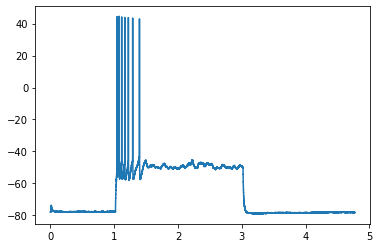

AHP_depth_1.5x
AHP_depth_abs_1.5x
ISI_values_1.5x
Spikecount_1.5x
adaptation_index_1.5x
adaptation_index2_1.5x
all_ISI_values_1.5x
mean_AP_amplitude_1.5x
min_voltage_between_spikes_1.5x
minimum_voltage_1.5x
peak_voltage_1.5x
spike_half_width_1.5x
time_to_first_spike_1.5x
time_to_last_spike_1.5x
voltage_base_1.5x


In [4]:
target = StaticModel(vm=suite.traces['vm15']) #DataTC(backend="model_type")
target.vm15 = suite.traces['vm15'] 

plt.plot(vmm.times,vmm)
plt.show()
nu_tests = suite.tests
    
clean_nu_tests = []
for t in nu_tests:
    if t.observation is not None:
        clean_nu_tests.append(t)
        print(t.name)

nu_tests = clean_nu_tests
nu_tests

# parameters that make a similar cell.
cm	v_spike	v_reset	v_rest	tau_m	a	b	delta_T	tau_w	v_thresh	spike_delta
0	129.873809	-140.0	-27.514162	-42.419064	31.51851	10.894431	-0.048309	14.218536	80.749994	-22.420621	24.13769

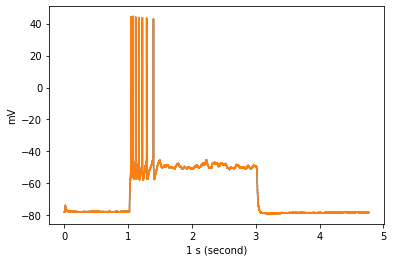

In [5]:
check_bin_vm15(target,target)